# **Importar Librerias Y datasets**


In [ ]:
# Damos acceso a drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IAEmotiva

[Errno 2] No such file or directory: '/content/drive/MyDrive/IAEmotiva'
/content


In [ ]:
!pip install tensorflow==2.3.0
!pip install keras==2.3.0

In [ ]:
# Importar los paquetes necesarios
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as k
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Using TensorFlow backend.


ModuleNotFoundError: ignored

In [ ]:
# Leer el archivo .cvs
keyFacial_df = pd.read_csv('data.csv')

In [ ]:
keyFacial_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [ ]:
# Obtener info importante del conjunto de datos
keyFacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [ ]:
# Comprobar si hay valores nulos
keyFacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
keyFacial_df['Image'].shape

(2140,)

In [ ]:
# Los valores para la imagen se proporcionan como cadenas separadas por espacios.
# Separar los valores utilizando las comillas.
# Convertir a una matriz numerica utilizando np.fromstring
# Nos permite convertir la matriz 1D obtenida en una matriz 2D(96,96)
keyFacial_df['Image'] = keyFacial_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep=' ').reshape(96,96))

In [ ]:
# Obtener la forma de la imagen
keyFacial_df['Image'][0].shape

(96, 96)

In [ ]:
min(keyFacial_df['right_eye_center_x'])

18.9226106286

In [ ]:
max(keyFacial_df['right_eye_center_x'])

42.495171727

In [ ]:
from statistics import mean
mean(keyFacial_df['right_eye_center_x'])

29.640268564561495

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
keyFacial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


# **Visualizar Imagenes**

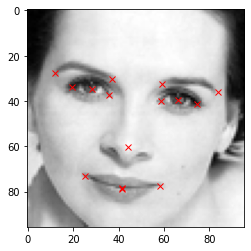

In [ ]:
# Seleccionamos una imagen aleatoria del conjunto de datos junto con puntos clave faciales.
# Los datos de la imagen los obtenemos de df['Image'] y los vamos a representar utilixzando
# plt.imshow 15 coordenadas x e y para la imagen correspondinte las coordenadas x estan
# en las columnas pares y las coordenadas de y estan en columnas impares. Utilizaremos la funcion
# .loc, obtine los valores de las coordenadas de la imagen en funcion de la columna a la
# que nos referimos.
i = np.random.randint(1, len(keyFacial_df))
plt.imshow(keyFacial_df['Image'][i], cmap='gray')
for j in range(1, 31, 2):
  plt.plot(keyFacial_df.loc[i][j-1], keyFacial_df.loc[i][j], 'rx')

In [ ]:
# Mostrar imagenes en formato matricial
fig = plt.figure(figsize=(20,20))
for i in range(4, 4, i+1):
  ax = fig.add_subplot(4, 4, i+1)
  image = plt.imshow(keyFacial_df['Image'][i], cmap = 'gray')
  for j in range(1,31,2):
    plt.plot(keyFacial_df.loc[i][j-1], keyFacial_df.loc[i][j], 'rx')

<Figure size 1440x1440 with 0 Axes>

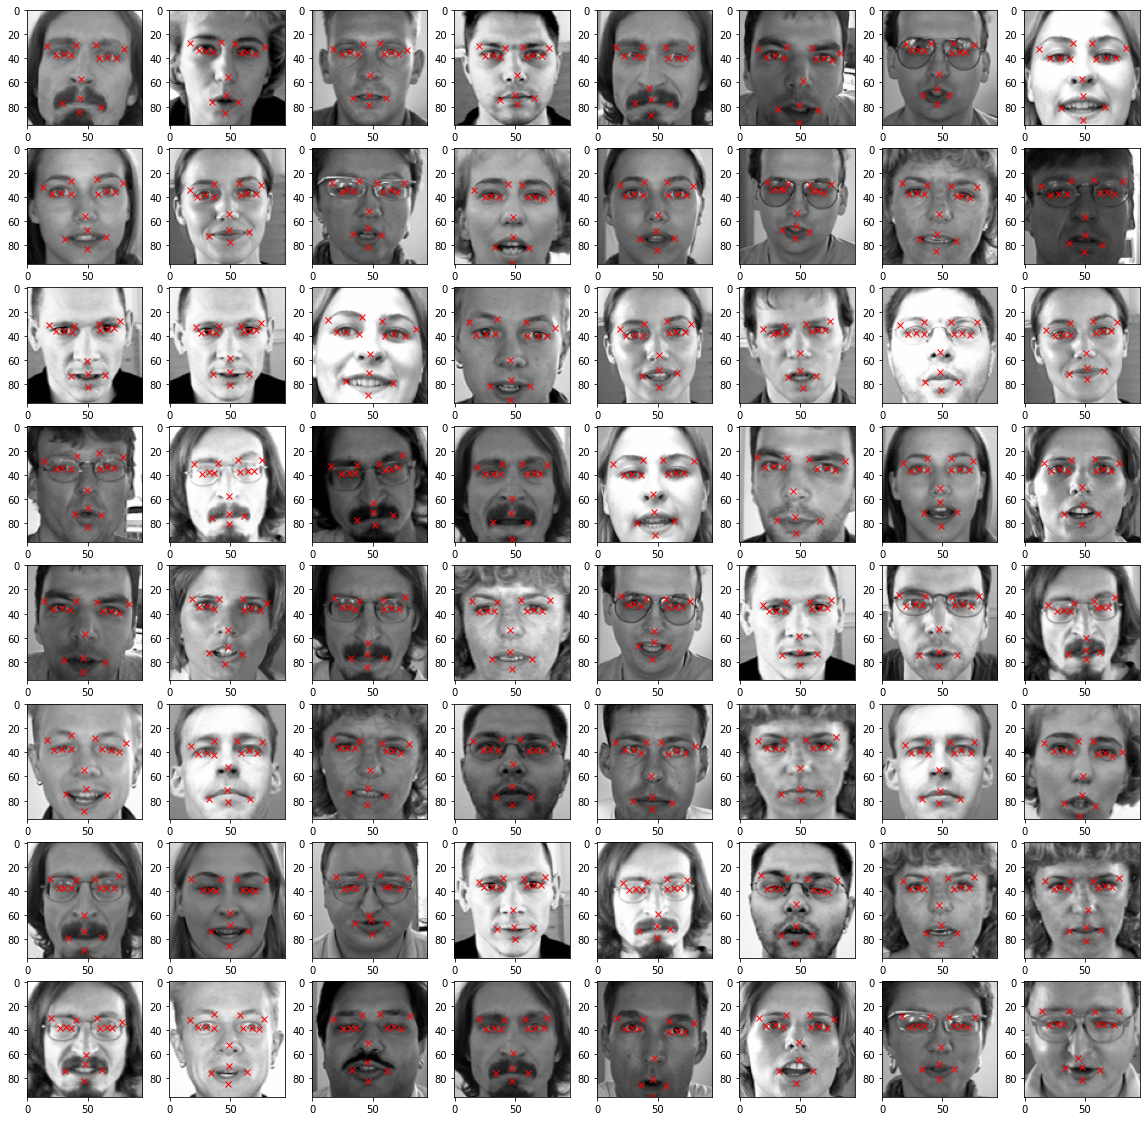

In [ ]:
# Realizar una verificacion adicional en los datos visualizando
# aletoriamente 64 nuevas imagenes junto con sus puntos clave
# correspondinte.
fig = plt.figure(figsize=(20,20))
for i in range(64):
  ax = fig.add_subplot(8, 8, i+1)
  image = plt.imshow(keyFacial_df['Image'][i], cmap = 'gray')
  for j in range(1,31,2):
    plt.plot(keyFacial_df.loc[i][j-1], keyFacial_df.loc[i][j], 'rx')

# **Aumento de imagenes**

In [ ]:
# Crerar una copia del dateframe
import copy
keyFacial_df_copy = copy.copy(keyFacial_df)

In [ ]:
# Obtener las columnas del dateframe
columns = keyFacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [ ]:
# Horizontal FLIP -Damos vuelta a las imagenes entorno al eje y
keyFacial_df_copy['Image'] = keyFacial_df_copy['Image'].apply(lambda x: np.flip(x, axis=1))

# Cambiaremos los valores de la coordenada x.
for i in range(len(columns)):
  if i % 2 == 0:
    keyFacial_df_copy[columns[i]] = keyFacial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

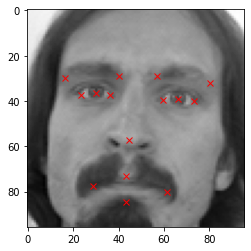

In [ ]:
# Mostrar imagen original
plt.imshow(keyFacial_df['Image'][0], cmap='gray')
for j in range(1, 31, 2):
  plt.plot(keyFacial_df.loc[0][j-1], keyFacial_df.loc[0][j], 'rx')

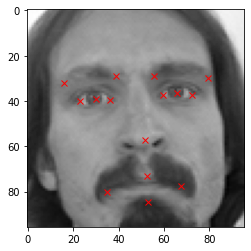

In [ ]:
# Mostrar imagen girada horizontalmente
plt.imshow(keyFacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
  plt.plot(keyFacial_df_copy.loc[0][j-1], keyFacial_df_copy.loc[0][j], 'rx')

In [ ]:
aument_df = np.concatenate((keyFacial_df, keyFacial_df_copy))

In [ ]:
aument_df.shape

(4280, 31)

In [ ]:
# Aumentar aletoriamente el brillo de las imagenes
# Multiplicar los valores de los pixeles por valores aletorios entre 1.5 y 2
# Para aumentar el brillo de la imagen, recortamos el vaor entre 0 y 255
import random

keyFacial_df_copy = copy.copy(keyFacial_df)
keyFacial_df_copy['Image'] = keyFacial_df_copy['Image'].apply(lambda x: np.clip(random.uniform(1.5,2)* x, 0.0, 255.0))
aument_df = np.concatenate((aument_df, keyFacial_df_copy))
aument_df.shape

(6420, 31)

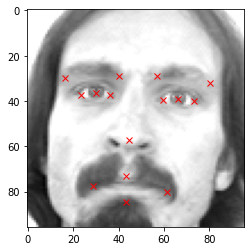

In [ ]:
# Mostrar imagen con brillo
plt.imshow(keyFacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
  plt.plot(keyFacial_df_copy.loc[0][j-1], keyFacial_df_copy.loc[0][j], 'rx')

In [ ]:
# Aumentar las imagenes volteandola verticalmente (Nota: voltea a lo largo del
# eje x y ten en cuenta que si lo hacemos a lo largo del eje x, las coordenadas
# x no cambiaran)
keyFacial_df_copy['Image'] = keyFacial_df_copy['Image'].apply(lambda x: np.flip(x, axis=0))

# Cambiaremos los valores de la coordenada y.
for i in range(len(columns)):
  if i % 2 == 0:
    keyFacial_df_copy[columns[i]] = keyFacial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

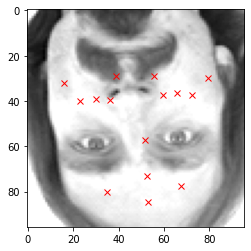

In [ ]:
# Mostrar imagen girada verticalmente
plt.imshow(keyFacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
  plt.plot(keyFacial_df_copy.loc[0][j-1], keyFacial_df_copy.loc[0][j], 'rx')

# **Normalizacion de los datos y preparacion para el entrenamiento**

In [ ]:
# Obtener el valor de las imagenes que están en la columna 31
img = aument_df[:,30]

# Normalizamos las imagenes
img = img/255.

In [ ]:
# Crear un array vacio de tamaño (x,96,96,1)
X = np.empty((len(img),96,96,1))

# Iteramos sobre la lista de imagenes --- Expandir la dimension del array
# vacio de (96,96)(96,96,1)
for i in range(len(img)):
  X[i, ] = np.expand_dims(img[i], axis = 2)

# Convertir el tipo array a float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [ ]:
# Obtener el valor de las coordenadas x & y que se usaran como target
y = aument_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [ ]:
# Dividir los datos en entrenaminto y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5136, 96, 96, 1)
(1284, 96, 96, 1)


# **Notas clase: Redes Neuronales Artificiales**

**Función Lineal:** Esta función también conocida como identidad, permite que lo de la entrada sea igual a la salida por lo que si tengo un red neuronal de varias capas y aplicó función lineal se dice que es una regresión lineal. Por lo tanto, esta función de activación lineal se usa si a la salida se requiere una regresión lineal y de esta manera a la red neuronal que se le aplica la función va a generar un valor único. Por ejemplo se usa cuando se solicita predecir el valor de un número de ventas.

**Función Sigmoide:** Esta función también conocida como función logística, está en un rango de valores de salida está entre cero y uno por lo que la salida es interpretada como una probabilidad. Si se evalúa la función con valores de entrada muy negativos, es decir x<0 la función será igual a cero, si se evalúa en cero la función dará 0.5 y en valores altos su valor es aproximadamente a 1. Por lo que esta función se usa en la última capa y se usa para clasificar datos en dos categorías.

**Función ReLu:** Está función es la más utilizada debido a que permite el aprendizaje muy rápido en las redes neuronales. Si a esta función se le da valores de entrada muy negativos el resultado es cero pero si se le da valores positivos queda igual y además el gradiente de esta función será cero en el segundo cuadrante y uno en el primer cuadrante. Cuando se tiene que la función es igual a cero y su derivada también lo es se genera lo que es la muerte de neuronas, a pesar que puede ser un inconveniente en algunos casos permite la regularización Dropout. Por esta razón la función ReLu tiene una variante denominada Leaky ReLu que va a prevenir que existan neuronas muertas debido a la pequeña pendiente que existe cuando x<0.

**ANN:**
Las redes neuronales artificiales son uno de los exponentes de la inteligencia artificial (IA), bajo el paraguas del aprendizaje automático o machine learning, que hace posible que las máquinas puedan ejecutar tareas o funciones que no éramos capaces de automatizar con los sistemas convencionales.

**CNN:** Las Redes neuronales convolucionales son  un tipo de redes neuronales artificiales  donde las “neuronas”  corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico.  Este tipo de red es una variación de un perceptrón multicapa, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.

**RNN:** Una red neuronal recurrente (RNN) es un tipo de red neuronal artificial que utiliza datos secuenciales o datos de series de tiempo. Estos algoritmos de aprendizaje profundo se utilizan comúnmente para problemas ordinales o temporales, como la traducción de idiomas, el procesamiento de lenguaje natural (nlp), el reconocimiento de voz y subtítulos de imágenes; están incorporados en aplicaciones populares como Siri, búsqueda por voz y Google Translate. Al igual que las redes neuronales feedforward y convolucionales (CNN), las redes neuronales recurrentes utilizan datos de entrenamiento para aprender.

# **Comentarios de la RESNET**

La función llamada **res_block** representa un bloque residual, que es una unidad básica en una red neuronal convolucional residual (ResNet).

En una ResNet, los bloques residuales se utilizan para mejorar el rendimiento de la red permitiendo que la información fluya más fácilmente a través de la red y previniendo el problema de degradación del rendimiento que puede surgir en las redes neuronales muy profundas.

La función **res_block** toma tres argumentos: X (un tensor de entrada), filter (una tupla que contiene tres números enteros que representan los filtros que se utilizarán en la convolución) y stage (un número entero que se utiliza para nombrar las capas dentro del bloque).

El bloque residual consta de dos caminos: el camino principal y el camino corto. El camino principal consiste en varias capas de convolución y normalización de lotes, mientras que el camino corto simplemente copia la entrada original y la transforma en una forma adecuada para que se pueda sumar al camino principal.

En general, el camino principal realiza las siguientes operaciones:

1. Una convolución con un kernel de 1x1.
2. Normalización de lotes.
3. Aplicación de una función de activación ReLU.
4. Una convolución con un kernel de 3x3.
5. Normalización de lotes.
6. Aplicación de una función de activación ReLU.
7. Una convolución con un kernel de 1x1.
8. Normalización de lotes.

Luego, los resultados de la última capa de convolución del camino principal se suman con la entrada original transformada por el camino corto. Finalmente, se aplica una función de activación ReLU al resultado de la suma.

Este bloque residual se repite varias veces en una ResNet para crear una red neuronal profunda. Cada bloque residual tiene un camino corto que es una identidad si las dimensiones de entrada y salida son las mismas y una convolución si las dimensiones son diferentes.

# **Crear un modelo de red residual profunda para obtener un modelo que detecte puntos faciales clave.**

In [ ]:
def res_block(X, filter, stage):
  #Bloque convolucional
  X_copy = X
  f1, f2, f3 = filter

  # La función Conv2D es una capa de convolución en dos dimensiones que se utiliza en redes neuronales
  # convolucionales para extraer características de las imágenes de entrada.
  # La capa Conv2D también tiene varios parámetros, como el tamaño del kernel,
  # el número de filtros, la tasa de aprendizaje, etc., que se pueden ajustar para obtener el mejor rendimiento de la red.

  ####### Camino principal
  # X: El tensor de entrada que se usará para construir la capa Conv2D.
  # f1: El número de filtros (o canales) de salida en la capa Conv2D.
  # (1, 1): El tamaño del kernel de convolución de la capa Conv2D. En este caso, es un
  # kernel de 1x1, lo que significa que la capa realizará una convolución en cada píxel
  # individualmente, sin combinar información de píxeles cercanos.
  # name: El nombre de la capa Conv2D. En este caso, se utiliza para identificar la capa en el
  # gráfico de la red neuronal y en los mensajes de registro.
  # kernel_initializer: La función de inicialización de pesos que se utilizará para
  # inicializar los pesos de la capa Conv2D. En este caso, se utiliza la inicialización de Xavier-
  # Glorot uniforme, que es una técnica popular para inicializar los pesos de la red neuronal.
  # MaxPool2D: La capa de pooling máxima se utiliza para reducir la dimensión espacial de la salida de la capa Conv2D.
  # (2, 2): El tamaño de la ventana de pooling de la capa MaxPooling2D. En este caso,
  # se utiliza una ventana de 2x2 para reducir la dimensión espacial de la salida de la capa Conv2D a la mitad.
  # BatchNormalization: La capa BatchNormalization se utiliza para normalizar la activación de la capa anterior,
  # lo que ayuda a estabilizar la red y a reducir el impacto de los cambios en la distribución de los datos de entrada.
  # axis: El eje en el que se normalizará la activación de la capa anterior. En este caso, el eje 3 se refiere al eje de los canales.
  # Activation: La función de activación que se aplicará a la salida de la capa BatchNormalization. En este caso, se utiliza la función
  # de activación ReLU para introducir no linealidad en la red neuronal y hacer que la salida sea más robusta a
  # las perturbaciones en los datos de entrada.
  X = Conv2D(f1,(1,1), name = 'res_'+ str(stage)+ "_conv_a", kernel_initializer=glorot_uniform(seed=0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis = 3, name = 'bn_'+str(stage) + "_conv_a")(X)
  X = Activation('relu')(X)

  # f2: número de filtros que se utilizarán en la capa convolucional.
  # kernel_size=(3,3): tamaño de los filtros convolucionales.
  # strides = (1,1): tamaño del paso que se dará al desplazar el filtro en la imagen durante la convolución.
  # padding = 'same': relleno que se aplicará a los bordes de la imagen para que los bordes también se convolucionen.
  # name = 'res_'+str(stage)+"_conv_b": nombre de la capa convolucional, que se usará para identificar la capa en el modelo.
  # kernel_initializer=glorot_uniform (seed = 0): método utilizado para inicializar los pesos de los filtros.
  # seed = 0: El parámetro seed se usa para inicializar un generador de números pseudoaleatorios
  # en la función de inicialización de pesos. Esto permite que la inicialización de pesos sea reproducible,
  # es decir, si se usa el mismo seed en diferentes ejecuciones del modelo, se obtendrán los mismos resultados.
  # BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_conv_b'): normalización por lotes, que ayuda a estandarizar la entrada a la capa convolucional.
  # Activation('relu'): función de activación que se aplicará a la salida de la capa convolucional. En este caso, se utiliza la función ReLU.
  X = Conv2D(f2, kernel_size=(3,3), strides = (1,1), padding = 'same',name = 'res_'+str(stage)+"_conv_b", kernel_initializer=glorot_uniform (seed = 0))(X)
  X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_conv_b') (X)
  X = Activation('relu')(X)


  # X: la entrada a la capa Conv2D.
  # f3: el número de filtros que se usarán en la convolución.
  # kernel_size: el tamaño de la ventana de convolución, en este caso es una ventana de 1x1.
  # strides: el desplazamiento del filtro en cada dirección durante la convolución, en este caso se desplaza una unidad en ambas direcciones.
  # name: el nombre de la capa.
  # kernel_initializer: el método de inicialización de los pesos de los filtros. En este caso se utiliza Glorot uniforme con una semilla de 0.
  # BatchNormalization: normalización por lotes, un método utilizado para estabilizar la distribución de los datos de entrada. El parámetro axis
  # especifica la dimensión a lo largo de la cual se normalizarán los datos, en este caso se normalizará a lo largo del eje 3, que corresponde
  # a la dimensión de los canales de la imagen.
  # Activation: la función de activación que se aplicará después de la normalización por lotes. En este caso se utiliza la
  # función ReLU para introducir no linealidad en la red.
  X = Conv2D(f3, kernel_size=(1,1), strides =(1,1), name = 'res_'+str(stage)+"_conv_c", kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis=3, name = "bn_"+str(stage)+'conv_c')(X)

  #Camino corto
  # f3: El número de filtros que se van a usar en la capa Conv2D del shortcut.
  # Este valor debe ser igual al número de filtros que se usan en la capa Conv2D
  # final de la capa convolucional principal.
  # kernel_size=(1,1): El tamaño del kernel (o filtro) que se va a usar en la
  # convolución. En este caso es un kernel de tamaño 1x1, lo que significa que no hay agrupamiento de características.
  # strides=(1,1): Los valores de desplazamiento que se usan para mover el
  # kernel sobre la entrada. En este caso, el kernel se mueve de a una posición a la vez en ambas dimensiones.
  # name='res_'+str(stage)+"_conv_copy": El nombre que se le da a la capa Conv2D del shortcut.
  # Se utiliza la variable stage para indicar la etapa de la ResNet.
  # kernel_initializer=glorot_uniform(seed=0): La inicialización de los pesos de los filtros.
  # En este caso se utiliza la inicialización Glorot uniforme con una semilla (seed) de 0,
  # lo que significa que los valores iniciales de los pesos serán aleatorios pero reproducibles.
  # X_copy = MaxPool2D((2,2))(X_copy): Después de la capa Conv2D se aplica una capa de pooling
  # (en este caso, una capa MaxPool2D) para reducir el tamaño de la entrada del shortcut.
  # En este caso, se utiliza un filtro de pooling de tamaño 2x2.
  # X_copy = BatchNormalization(axis = 3, name='bn_'+str(stage)+ '_conv_c')(X): Después de la capa de pooling,
  # se aplica una capa de normalización de lotes (BatchNormalization) para normalizar las activaciones de la capa.
  # En este caso, el eje (axis) de normalización es el eje 3 (correspondiente al eje de los canales de la imagen).
  # También se le da un nombre a la capa de normalización utilizando la variable stage.
  X_copy = Conv2D(f3, kernel_size=(1,1), strides=(1,1), name='res_'+str(stage)+"_conv_copy", kernel_initializer=glorot_uniform(seed=0))(X)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis = 3, name='bn_'+str(stage)+ '_conv_c')(X)

  # Añadir
  # En esta parte, se está implementando la operación de "skip connection" o "conexión directa" en la red neuronal.
  # La idea es que se sumen los valores de la salida de la capa anterior (almacenada en la variable X_copy) con la
  # salida de la capa actual (almacenada en la variable X). Esto permite que la información fluya más fácilmente a
  # través de la red y ayuda a prevenir el problema de gradiente desvaneciente.
  # Luego de la suma, se aplica la función de activación ReLU a la salida obtenida.
  X = Add()([X, X_copy])
  X = Activation('relu')(X)

  #Bloque de identidad 1
  X_copy= X

  #Camino principal
  # f1: número de filtros a utilizar en la convolución. En este caso, es el número de
  # filtros para la primera capa de convolución del bloque de identidad.
  # (1, 1): tamaño del kernel de la convolución. En este caso, se utiliza un kernel de tamaño 1x1.
  # strides=(1, 1): número de pasos que se dan al desplazar el kernel sobre la imagen en la convolución.
  # En este caso, se utiliza un valor de 1 para no reducir el tamaño de la imagen.
  # name="res_"+str(stage)+"_identity_1_a": nombre dado a la capa de convolución para identificarla.
  # kernel_initializer=glorot_uniform(seed=0): método de inicialización de los pesos de los filtros.
  # En este caso, se utiliza el método de Glorot uniforme con una semilla aleatoria de valor 0.
  # X: entrada a la capa de convolución, que proviene de la capa anterior.
  # BatchNormalization(axis=3, name='bn_'+ str(stage)+'_identity_1_a'): normalización de los
  # valores de los filtros en la capa de convolución para acelerar el entrenamiento de la red.
  # En este caso, se utiliza la normalización por lotes con una semilla aleatoria de valor 0.
  # Activation('relu'): función de activación para introducir no-linealidad en la salida de la
  # capa de convolución. En este caso, se utiliza la función ReLU (Rectified Linear Unit).
  X = Conv2D(f1, (1,1), strides=(1,1), name = "res_"+str(stage)+"_identity_1_a", kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  # f2: el número de filtros que se utilizarán para la capa convolucional.
  # kernel_size=(3,3): el tamaño del kernel de la convolución, que en este caso es de 3x3.
  # strides = (1,1): los pasos de desplazamiento horizontal y vertical para cada filtro.
  # padding='same': el tipo de relleno que se va a aplicar. En este caso, se usa 'same',
  # que añade ceros alrededor de la imagen para mantener el tamaño de salida igual que el de entrada.
  # name='res_'+str(stage)+"_identity_1_b": el nombre que se le da a esta capa convolucional.
  # kernel_initializer=glorot_uniform(seed=0): el método de inicialización de los pesos de la capa convolucional.
  # BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_identity_1_b'): la normalización por lotes se aplica
  # para normalizar la activación de la capa anterior.
  # Activation('relu'): la función de activación utilizada después de la normalización por lotes es la función ReLU.
  X = Conv2D(f2, kernel_size=(3,3), strides = (1,1), padding = 'same',name = 'res_'+str(stage)+"_identity_1_b", kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  # f3: Entero, número de filtros a utilizar en la capa Conv2D.
  # kernel_size=(1,1): Tupla, tamaño de la ventana de convolución. En este caso,
  # se utiliza un tamaño de 1x1, lo que significa que la capa convoluciona cada píxel de la entrada sin agruparlos.
  # strides=(1,1): Tupla, longitud del paso de la convolución en cada dimensión. En este caso, se utiliza un tamaño de paso de 1x1.
  # name='res_'+str(stage)+"_identity_1_c": Nombre de la capa.
  # kernel_initializer=glorot_uniform(seed=0): Función de inicialización de pesos de la capa Conv2D.
  # En este caso, se utiliza la inicialización de Glorot uniforme.
  # X: Tensor de entrada a la capa.
  # BatchNormalization(axis=3, name="bn_"+str(stage)+'_identity_1_c'): Normalización de lotes del tensor de entrada.
  # axis=3 indica que la normalización se realiza en el último eje, correspondiente a los canales. name es el nombre de la capa.
  # X = Activation('relu')(X): Función de activación rectificadora aplicada al tensor de salida de la capa.
  X = Conv2D(f3, kernel_size=(1,1), strides =(1,1), name = 'res_'+str(stage)+"_identity_1_c", kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis=3, name = "bn_"+str(stage)+'_identity_1_c')(X)

  #añadir
  X = Add()([X,X_copy])
  X = Activation("relu")(X)

  #Bloque de identidad 2
  X_copy= X

  #Camino principal
  # f1: Número de filtros de convolución que se utilizarán en la capa. Este valor se utiliza para
  # definir la dimensión de la salida de la capa de convolución.
  # (1,1): Tamaño del kernel de convolución que se utilizará en la capa.
  # strides=(1,1): Tamaño del paso que dará el kernel en cada convolución.
  # name="res_"+str(stage)+"_identity_2_a": Nombre de la capa.
  # kernel_initializer=glorot_uniform(seed=0): Función de inicialización de los pesos de la capa de convolución.
  # BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_a'): Capa de normalización por lotes,
  # que se utiliza para mejorar el rendimiento y la estabilidad de la red.
  # Activation('relu'): Función de activación ReLU que se aplicará después de la capa de convolución.
  X = Conv2D(f1, (1,1), strides=(1,1), name = "res_"+str(stage)+"_identity_2_a", kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  # X: la salida de la capa anterior o la entrada actual.
  # f1: número de filtros de la primera capa convolucional en el camino principal.
  # (1, 1): el tamaño del kernel de convolución en el camino principal.
  # strides=(1,1): los desplazamientos horizontal y vertical en la convolución.
  # name: un nombre único para identificar esta capa.
  # kernel_initializer=glorot_uniform(seed=0): un esquema de inicialización de peso para la capa.
  # padding='same': cero relleno para mantener el tamaño de la imagen de entrada.
  # X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_identity_2_b')(X): Normalización por lotes en la capa convolucional.
  # X = Activation('relu')(X): Función de activación rectificada linealmente (ReLU) para introducir no linealidad en la salida de la capa convolucional.
  X = Conv2D(f2, kernel_size=(3,3), strides = (1,1), padding = 'same',name = 'res_'+str(stage)+"_identity_2_b", kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis = 3, name = 'bn_'+ str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  # X: La entrada tensorial para este bloque de identidad.
  # f3: El número de filtros para la capa convolucional final.
  # kernel_size: El tamaño de la ventana de la convolución. En este caso, es un kernel de 1x1, lo que significa que
  # se realiza una convolución de punto a punto (también conocida como una operación de tipo "fully connected") para cada píxel de la imagen.
  # strides: El paso de la convolución en cada dirección espacial. Aquí es (1,1), lo que significa que la ventana de la convolución
  # se mueve un píxel a la vez en ambas direcciones.
  # name: El nombre de la capa.
  # kernel_initializer: Un esquema de inicialización para los pesos de la capa convolucional.
  # En este caso, se utiliza la inicialización Glorot uniforme con una semilla (seed) de 0.
  # padding: El tipo de relleno que se utiliza en la convolución. Aquí, el relleno es 'same',
  # lo que significa que se agrega suficiente relleno a la imagen de entrada para que la salida tenga la misma forma que la entrada.
  # axis: El eje en el que se normalizan los datos. Aquí es el eje 3, que corresponde al canal de color en la imagen.
  # name: El nombre de la capa de normalización por lotes.
  # Activation: La función de activación que se aplica después de la normalización por lotes. Aquí se utiliza ReLU (unidad lineal rectificada).
  X = Conv2D(f3, kernel_size=(1,1), strides =(1,1), name = 'res_'+str(stage)+"_identity_2_c", kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis=3, name = "bn_"+str(stage)+'_identity_2_c')(X)

  #añadir
  X = Add()([X,X_copy])
  X = Activation("relu")(X)

  return X


In [ ]:
# especifica la forma de los datos de entrada (96x96 píxeles en escala de grises).
input_shape = (96,96,1)

# Tamaño del tensor de entrada, crea una instancia de entrada para los datos.
X_input = Input(input_shape)

# Zero Padding: añade un relleno de ceros alrededor de la imagen de entrada para evitar la pérdida de información en los bordes durante la convolución.
X = ZeroPadding2D((3,3))(X_input)

# Primer fase
# Conv2D: realiza una convolución 2D con un filtro de 64 kernels (tamaño 7x7) y un desplazamiento (stride) de 2x2.
# Esta capa es la primera de la red y se utiliza para extraer características de la imagen.
# BatchNormalization: normaliza los datos de entrada para evitar la degradación del rendimiento de la red.
# Activation: agrega una función de activación ReLU para introducir no-linealidad en la red.
# MaxPooling2D: realiza una operación de agrupamiento para reducir la dimensión del tensor de salida.
X = Conv2D(64,(7,7), strides=(2,2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2))(X)

# Segunda fase
# res_block: define una función para crear un bloque residual, que consta de dos bloques de identidad y
# un bloque de proyección. En cada bloque, se utiliza la convolución 2D, la normalización por lotes y la activación ReLU.
X = res_block(X, filter=[64,64,256], stage=2)

# Tercera fase
# res_block: define una función para crear un bloque residual, que consta de dos bloques de identidad y
# un bloque de proyección. En cada bloque, se utiliza la convolución 2D, la normalización por lotes y la activación ReLU.
X = res_block(X, filter=[128,128,512], stage=3)

# Average pooling
# AveragePooling2D: reduce aún más la dimensión del tensor de salida mediante la operación de promediado.
X = AveragePooling2D((2,2), name = "Average_Pooling")(X)

# Capa Final
# Flatten: aplana la matriz de salida para que pueda ser alimentada a una capa densa.
# Dense: capa de neuronas completamente conectadas con activación ReLU.
# Dropout: apaga aleatoriamente algunas neuronas durante el entrenamiento para evitar el sobreajuste.
X = Flatten()(X)
X = Dense(4096, activation='relu')(X)
# Dropout elimina neuronas para evitar sobreajuste
X = Dropout(0.2)(X)
X = Dense(2048, activation='relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation='relu')(X)

# Model: define la instancia de la red neuronal con una entrada (X_input) y una salida (X).
# model1_facialKeyPoints.summary(): muestra un resumen de la arquitectura de la red neuronal,
# incluyendo información sobre el tamaño y la forma de los datos de entrada y salida, así como
# el número de parámetros que se deben ajustar durante el entrenamiento.
model1_facialKeyPoints = Model(inputs = X_input, outputs = X)
model1_facialKeyPoints.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

# **Compilar y entrenar el modelo de deep learning para la deteccion de puntos faciales claves**

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00003, beta_1=0.9, beta_2=0.999, amsgrad=False)
model1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam, metrics=["accuracy"])

In [ ]:
# Guardar el mejor modelo con mejor error de validacion
checkpointer = ModelCheckpoint(filepath="FacialKeyPoints_weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model1_facialKeyPoints.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.40, callbacks=[checkpointer])
# Experimentando con el cambio de tamaño de lote y del valor de validation split y número de epocas.

# **Evaluar la eficacia del modelo de deteccion de puntos faciales clave entrenado**

In [ ]:
# Guaradar la arquitectura del modelo en un json para luego utilizarlo
# Cambiar el nombre del archivo a FacialKeyPoints-modelN.json n es el numero de modelo que se esta probando 1,2,3..
model_json = model1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model3.json", 'w') as json_file:
  json_file.write(model_json)

In [ ]:
with open("FacialKeyPoints-model3.json", "r") as json_file:
  json_saveModel = json_file.read()

# Cargar la arquitectura del modelo
model1_facialKeyPoints = tf.keras.models.model_from_json(json_saveModel)
model1_facialKeyPoints.load_weights("FacialKeyPoints_weights.hdf5")
adam = tf.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, amsgrad=False)
model1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam, metrics=["accuracy"])

In [ ]:
# Evaluar modelo
result = model1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

In [ ]:
# Obtener las claves del modelo
history.history.keys()

In [ ]:
# Reprsentar los resultados del entrenaminto
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.show

In [ ]:
# Reprsentar los resultados del entrenaminto
# El error de perdida debe ser menor
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc = 'upper right')
plt.show

# **Parte 2: Detección de expresiones faciales.**

Importar y explorar el conjunto de datos para la deteccón de expresiones faciales

In [ ]:
# Leer el archivo csv para los datos de expresiones faciales
facialexpression_df = pd.read_csv('icml_face_data.csv')

In [ ]:
facialexpression_df

In [ ]:
facialexpression_df.info()

In [ ]:
#Función para comvertir valores de pixel de
#formato string a formato array

def string2array(x):
  return np.array(x.split(' ')).reshape(48,48,1).astype('float32')

In [ ]:
#Redimensionamos la imagen (48,48) a (96,96)
def resize(x):
  img = x.reshape(48,48)
  return cv2.resize(img, dsize=(96,96), interpolation = cv2.INTER_CUBIC)

In [ ]:
facialexpression_df[' pixels']=facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [ ]:
facialexpression_df[' pixels']=facialexpression_df[' pixels'].apply(lambda x:resize(x))

In [ ]:
facialexpression_df.head()

In [ ]:
# Comprobamos estructura del dataframe
facialexpression_df.shape

(24568, 2)

In [ ]:
# Verificar si hay valores null
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [ ]:
label_to_text = {0:'Ira', 1:'Odio', 2:'Tristeza', 3:'Felicidad', 4:'Sorpresa'}

In [ ]:
#Mostramos la primera imagen del dataframe
plt.imshow(facialexpression_df[' pixels'][0],cmap = 'gray')

In [ ]:
emotions = [0,1,2,3,4]
for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion']== i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96,96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

In [ ]:
# Representar una grafica de barras para saber cuantas
# Muestras estan presentes por emocion
facialexpression_df.emotion.value_counts().index

In [ ]:
facialexpression_df.emotion.value_counts()

<AxesSubplot:ylabel='emotion'>

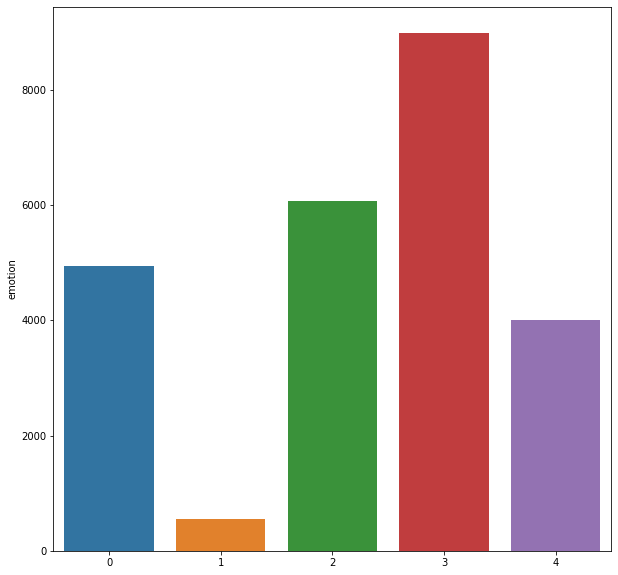

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

Preparación de los datos Y aumentacion de las imagenes

In [ ]:
from keras.utils import to_categorical

X = facialexpression_df[' pixels']
y =  to_categorical(facialexpression_df['emotion'])

In [ ]:
X[0]

In [ ]:
y

In [ ]:
X.shape

In [ ]:
X = np.stack(X, axis=0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [ ]:
# Dividir el data frame en conjunto de testing, entrenaminto y validacion
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [ ]:
print("Conjunto valiodacion: ", X_val.shape, y_val.shape)
print("Conjunto pruebas: ", X_test.shape, y_test.shape)
print("Conjunto entrenaminto: ", X_train.shape, y_train.shape)

In [ ]:
# Normalizar imagenes
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [ ]:
train_dategen = ImageDataGenerator (
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[1.1,1.5],
    fill_mode="nearest"
)

In [ ]:
# especifica la forma de los datos de entrada (96x96 píxeles en escala de grises).
input_shape = (96,96,1)

# Tamaño del tensor de entrada, crea una instancia de entrada para los datos.
X_input = Input(input_shape)

# Zero Padding: añade un relleno de ceros alrededor de la imagen de entrada para evitar la pérdida de información en los bordes durante la convolución.
X = ZeroPadding2D((3,3))(X_input)

# Primer fase:
# Conv2D: realiza una convolución 2D con un filtro de 64 kernels (tamaño 7x7) y un desplazamiento (stride) de 2x2.
# Esta capa es la primera de la red y se utiliza para extraer características de la imagen.
# BatchNormalization: normaliza los datos de entrada para evitar la degradación del rendimiento de la red.
# Activation: agrega una función de activación ReLU para introducir no-linealidad en la red.
# MaxPooling2D: realiza una operación de agrupamiento para reducir la dimensión del tensor de salida.
X = Conv2D(64,(7,7), strides=(2,2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2))(X)

# Segunda fase:
# res_block: define una función para crear un bloque residual, que consta de dos bloques de identidad y
# un bloque de proyección. En cada bloque, se utiliza la convolución 2D, la normalización por lotes y la activación ReLU.
X = res_block(X, filter=[64,64,256], stage=2)

# Tercera fase:
# res_block: define una función para crear un bloque residual, que consta de dos bloques de identidad y
# un bloque de proyección. En cada bloque, se utiliza la convolución 2D, la normalización por lotes y la activación ReLU.
X = res_block(X, filter=[128,128,512], stage=3)

# Cuarta fase:
# X = res_block(X, filter = [256, 256, 1024], stage=4)

# Average pooling
# AveragePooling2D: reduce aún más la dimensión del tensor de salida mediante la operación de promediado.
X = AveragePooling2D((4,4), name = "Average_Pooling")(X)

# Capa Final:
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_Final', kernel_initializer=glorot_uniform(seed=0))(X)

model_2_emotion = Model(inputs = X_input, outputs = X, name = 'ResNet18')
model_2_emotion.summary()

In [ ]:
# Entrenar nuestra red
model_2_emotion.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Utilizar la parada temprana
# En caso de que el error de validacion no disminuya despues
# de cierto número de epocas.
earlstopping = EarlyStopping(monitor= "Val_loss", mode = "min", verbose=1, patience=5)
# Guradar el modelo con menor error de validacion
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model_2_emotion.fit(train_dategen.flow(X_train, y_train, batch_size = 64), validation_data=(X_val, y_val),
                              steps_per_epoch=len(X_train)/64, epochs=7, callbacks = [checkpointer, earlstopping])

Epoch 1/7
346/345 [==============================] - ETA: 0s - loss: 1.3661 - accuracy: 0.4177
Epoch 00001: val_loss improved from inf to 1.80848, saving model to FacialExpression_weights.hdf5


346/345 [==============================] - 321s 927ms/step - loss: 1.3661 - accuracy: 0.4177 - val_loss: 1.8085 - val_accuracy: 0.2117
Epoch 2/7
346/345 [==============================] - ETA: 0s - loss: 1.1189 - accuracy: 0.5405
Epoch 00002: val_loss improved from 1.80848 to 1.61028, saving model to FacialExpression_weights.hdf5


346/345 [==============================] - 318s 919ms/step - loss: 1.1189 - accuracy: 0.5405 - val_loss: 1.6103 - val_accuracy: 0.2394
Epoch 3/7
346/345 [==============================] - ETA: 0s - loss: 0.9978 - accuracy: 0.6002


Epoch 00003: val_loss did not improve from 1.61028
346/345 [==============================] - 316s 914ms/step - loss: 0.9978 - accuracy: 0.6002 - val_loss: 1.6200 - val_accuracy: 0.2117
Epoch 4/7
346/345 [==============================] - ETA: 0s - loss: 0.9246 - accuracy: 0.6317
Epoch 00004: val_loss improved from 1.61028 to 1.53489, saving model to FacialExpression_weights.hdf5


346/345 [==============================] - 317s 916ms/step - loss: 0.9246 - accuracy: 0.6317 - val_loss: 1.5349 - val_accuracy: 0.2117
Epoch 5/7
346/345 [==============================] - ETA: 0s - loss: 0.8771 - accuracy: 0.6556


Epoch 00005: val_loss did not improve from 1.53489
346/345 [==============================] - 319s 923ms/step - loss: 0.8771 - accuracy: 0.6556 - val_loss: 1.6663 - val_accuracy: 0.2117
Epoch 6/7
346/345 [==============================] - ETA: 0s - loss: 0.8340 - accuracy: 0.6763


Epoch 00006: val_loss did not improve from 1.53489
346/345 [==============================] - 319s 921ms/step - loss: 0.8340 - accuracy: 0.6763 - val_loss: 2.0504 - val_accuracy: 0.2117
Epoch 7/7
346/345 [==============================] - ETA: 0s - loss: 0.8144 - accuracy: 0.6840


Epoch 00007: val_loss did not improve from 1.53489
346/345 [==============================] - 330s 954ms/step - loss: 0.8144 - accuracy: 0.6840 - val_loss: 1.8211 - val_accuracy: 0.2117


**Tarea:** correr el modelo con diferentes epocas y diferentes paradas tempranas y generar las graficas y opcionalmete generar la curva

In [ ]:
# Obtener las claves del modelo
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Evaluar modelo
result = model_2_emotion.evaluate(X_test, y_test)
print("Loss: {}".format(result[0]))
print("Accuracy: {}".format(result[1]))

39/39 [==============================] - 3s 84ms/step - loss: 1.8488 - accuracy: 0.2042
Loss: 1.8487833738327026
Accuracy: 0.20423108339309692


<function matplotlib.pyplot.show(close=None, block=None)>

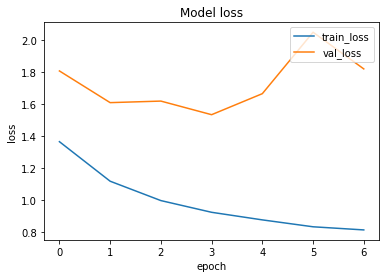

In [ ]:
# Reprsentar los resultados del entrenaminto
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

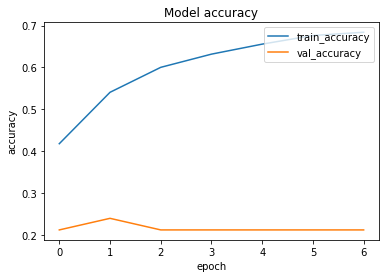

In [ ]:
# Reprsentar los resultados del entrenaminto
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc = 'upper right')
plt.show

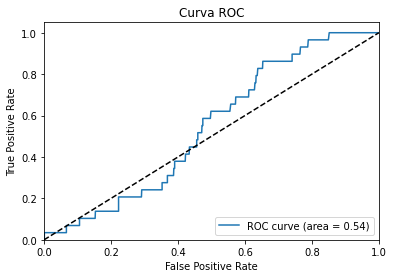

In [ ]:
# Curva ROC del modelo
from sklearn.metrics import roc_curve, auc
import numpy as np

# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred = model_2_emotion.predict(X_test)

# Obtener las probabilidades de las predicciones utilizando softmax
y_pred_prob = np.asarray([np.exp(val)/np.sum(np.exp(val)) for val in y_pred])

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test[:,1], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()